# LDA 
特徴<br>
1. データのクラス間距離が大きくなり
2. データのクラス内分散が小さくなる

LSQよりも外れ値に強い

## 流れ
モデルは，横軸を $x_1$, 縦軸を $x_2$ としたときに，
\begin{align}
&y(\boldsymbol{x}\mid\boldsymbol{w}, w_0) = \boldsymbol{w}^{T} \boldsymbol{x} + w_0\\
&= w_0 + w_1 x_1 + w_2 x_2
\end{align}
を考える．

### 1. データのクラス間距離が大きくなる
まず，各クラスの中心位置をそれぞれ $\boldsymbol{u}_1$ $\boldsymbol{u}_2$，
$$
\boldsymbol{u}_1 = \frac{1}{N_1} \sum_{n\in C1} \boldsymbol{x}_n \\
\boldsymbol{u}_2 = \frac{1}{N_2} \sum_{n\in C2} \boldsymbol{x}_n
$$
とする．

次に平面のパラメータを $\boldsymbol{w}$, $w_0$ としたときに，この点の平面までの距離を考える.
$$
m_1 = \frac{1}{N_1} \sum_{n\in C1} \boldsymbol{w}^{T} \boldsymbol{x}_n = \boldsymbol{w}^{T} \boldsymbol{u}_1\\
m_2 = \frac{1}{N_2} \sum_{n\in C2} \boldsymbol{w}^{T} \boldsymbol{x}_n = \boldsymbol{w}^{T} \boldsymbol{u}_2
$$．
これは符号付きの距離なので，$m_1 - m_2$ が最大になるときが， 特徴１のクラス間の距離が大きいを表す．

### 2. データのクラス内分散が小さくなる
クラス内の分散が小さくなる$\boldsymbol{w}$ を探す．
$$
s_1^2 = \frac{1}{N_1} \sum_{n\in C1} (\boldsymbol{w}^{T} (\boldsymbol{x}_n - \boldsymbol{u}_1))^2 
s_2^2 = \frac{1}{N_2} \sum_{n\in C2} (\boldsymbol{w}^{T} (\boldsymbol{x}_n - \boldsymbol{u}_2))^2 
$$
としたときに二つのグループの分散の和$s_1^2 + s_2^2$ が小さくなるような $\boldsymbol{w}$ を求めることで、特徴２のクラス内の分散が小さいを表す.

### 1,2を最大化(最小化)
Fisher's LDAは，
$$
J(\boldsymbol{w}) = \frac{(m_1 - m_2)^2}{s_1^2 + s_2^2}
$$
を最大化する $\boldsymbol{w}$ 

### より簡単に
データを中心化
$$
S_{B} = (\boldsymbol{u}_1 - \boldsymbol{u}_2)(\boldsymbol{u}_1 - \boldsymbol{u}_2)^{T} \\
S_{W} = \frac{1}{N_1}\sum_{n\in C1} (\boldsymbol{x}_n - \boldsymbol{u}_1)(\boldsymbol{x}_n - \boldsymbol{u}_1)^T
+
\frac{1}{N_2}\sum_{n\in C2} (\boldsymbol{x}_n - \boldsymbol{u}_2)(\boldsymbol{x}_n - \boldsymbol{u}_2)^T
$$
をもちいて，$\|\boldsymbol{w}\|^2 = 1$ の下で
$$
J(\boldsymbol{w}) = \frac{\boldsymbol{w}^T S_B \boldsymbol{w}}{\boldsymbol{w}^T S_W \boldsymbol{w}}
$$
を最大化する問題になる．

Lagrange 未定乗数法などを使用
$$
\boldsymbol{w} \propto S_W^{-1}(\boldsymbol{u}_1 - \boldsymbol{u}_2)
$$
となる．

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns; sns.set()

sns.set_context('talk')

np.random.seed(12345)

## データ生成

(-2.0, 6.0)

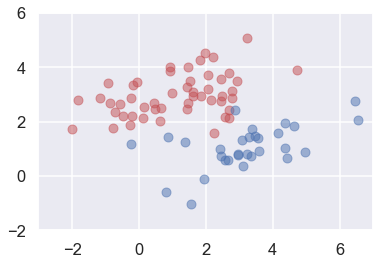

In [3]:
mu1 = np.array([1, 3])  # クラス1の中心
mu2 = np.array([3, 1])  # クラス2の中心
cov = 2 *np.array([[1.0,0.2], [0.2, 0.3]])  # 共分散行列（全クラス共通）
cov1 = cov2 = cov

N1 = 50
N2 = 30

# ガウス分布でサンプル取得
x1 = np.random.multivariate_normal(mu1, cov1, N1)
x2 = np.random.multivariate_normal(mu2, cov2, N2)
x = np.vstack((x1, x2))

# ラベルは±1
y1 = np.ones(N1)
y2 = -np.ones(N2)
y = np.hstack((y1, y2))

# 表示
plt.plot(x[y==1, 0], x[y==1, 1], 'ro', alpha=0.5)
plt.plot(x[y==-1, 0], x[y==-1, 1], 'bo', alpha=0.5)

plt.xlim(-3, 7)
plt.ylim(-2, 6)

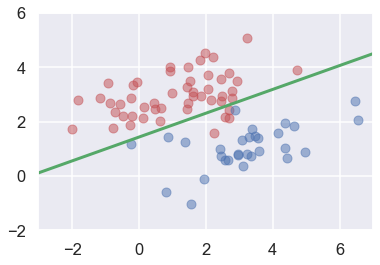

In [4]:
def SolverLDA(x, y):
    # 中心化
    Ex = x.mean(axis=0)
    newx = x - Ex
    
    # クラスごとにデータを分割
    x1 = newx[y == +1, :]
    x2 = newx[y == -1, :]
    N1 = np.sum(y == +1)
    N2 = np.sum(y == -1)
    
    u1 = x1.mean(axis=0)
    u2 = x2.mean(axis=0)
    
    Sw = (x1 - u1).T @ (x1 - u1) / N1 + (x2 - u2).T @ (x2 - u2) / N2
    
    w = np.linalg.solve(Sw, u1 - u2)
    w0 = 0
    
    # 元の座標に戻す
    w0 = w0 - w @ Ex
    return w, w0


w, w0 = SolverLDA(x, y)


# 表示
plt.plot(x[y==1, 0], x[y==1, 1], 'ro', alpha=0.5)
plt.plot(x[y==-1, 0], x[y==-1, 1], 'bo', alpha=0.5)

plt.xlim(-3, 7)
plt.ylim(-2, 6)

xx1 = np.linspace(-3, 7)
xx2 = (w[0] * xx1 + w0) / (-w[1])

plt.plot(xx1, xx2, 'g-', linewidth=3)